# 1-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다!

### 1. 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2. 데이터 준비

In [2]:
digits = load_digits()

### 3. 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

 - Feature Data 지정하기
 - Label Data 지정하기
 - Target Names 출력해 보기
 - 데이터 Describe 해 보기
 
데이터에 대해서 아무런 사전 정보가 없이 순수 탐색 과정을 통해서 데이터를 파악해보자.

### 3.1 데이터의 항목에는 무엇이 포함되어 있는지 살펴보고 각 항목을 세세하게 살펴본다. 

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


### 3.2 데이터에 대한 정보를 기술한 DESCR 키를 출력하고 살펴보자.

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

DESCR을 통해 다음의 내용들을 확인하였다.

데이터셋의 특성
 - 샘플 수 : 1797
 - 샘플의 차원 : 64 차원
 - 샘플 데이터의 구성 : 8 by 8 이미지로 구성된 64 차원의 정보이며 각 픽셀은 0 ~ 16 범위의 정수 값으로 구성
 - 샘플 내 누락된 값 없이 잘 정리된 데이터셋
 
해당 데이터셋은 0 ~ 9의 10 종류의 손글씨를 포함한다.  
32x32 비트맵 정보를 축소하여 0~16 범위의 정수값으로 표현되는 8x8 행렬 데이터를 생성하였음.

이를 통하여 우리가 분석하려는 데이터가 숫자를 표현하는 이미지 데이터라는 것을 유추하였다.

### 3.3 data 항목을 살펴보자

data의 샘플과 각각의 데이터의 차원 수를 확인하고  
data를 구성하고 있는 수의 범위가 0 ~ 16 인지 확인해보자

In [5]:
print("이미지 데이터의 차원 정보 :", digits.data.shape)

print("이미지 데이터의 값의 범위 :", set(digits.data[0]))
print("이미지 데이터의 값의 범위 :", set(digits.data[1]))
print("이미지 데이터의 값의 범위 :", set(digits.data[2]))
print("이미지 데이터의 값의 범위 :", set(digits.data[3]))

# 누락된 데이터가 있는지에 대해 파악

이미지 데이터의 차원 정보 : (1797, 64)
이미지 데이터의 값의 범위 : {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0}
이미지 데이터의 값의 범위 : {0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0}
이미지 데이터의 값의 범위 : {0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0}
이미지 데이터의 값의 범위 : {0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0}


data 분석을 통해 해당 정보가 8x8 이미지이며 단일 채널로 구성되는 정보라는 것을 확인하였다.  
따라서 64차원의 데이터를 reshape을 통해 8x8 이미지로 변경하고 단일 채널 정보임을 감안하여  
gray 스케일로 이미지를 표현한다.

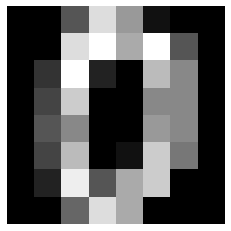

In [6]:
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

앞의 과정으로 이미지를 확인하였으니 다수의 이미지를 시각화하여 이미지의 형태와  
이미지에 어떤 숫자들이 포함되어 있는지 확인한다.

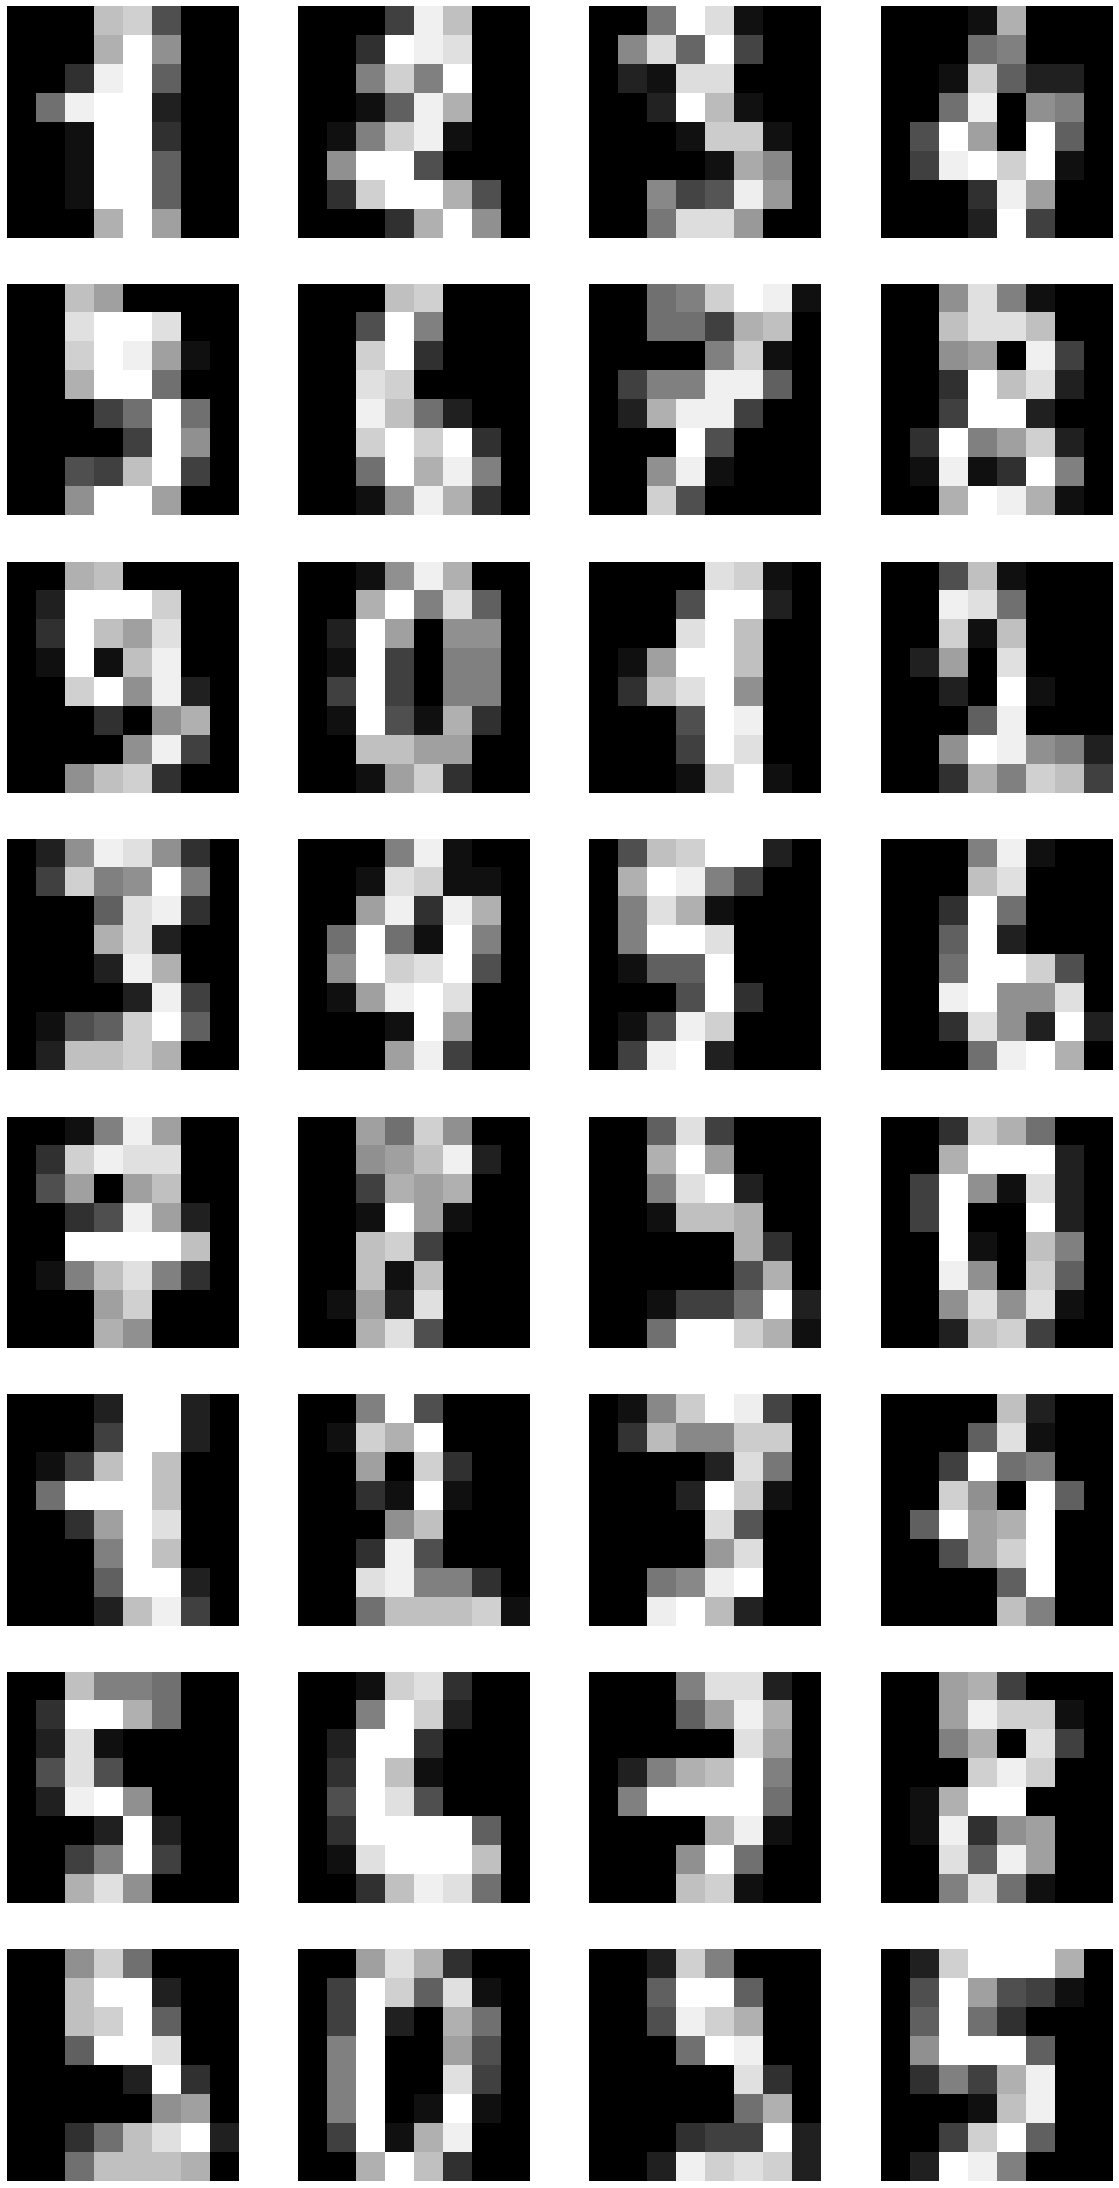

In [7]:
img_cnt = 1

plt.figure(figsize=(20, 40))
for i in range(8):
    for j in range(4):
        plt.subplot(8, 4, img_cnt)
        plt.imshow(digits.data[img_cnt].reshape(8, 8), cmap='gray')
        plt.axis('off')
        img_cnt += 1
plt.show()

0 ~ 9 범위의 숫자가 있는 것은 확인하였으나 이미지가 상당히 뭉개져 있어 숫자를 인식하기가 어렵다.  
각 숫자 이미지에 숫자의 label을 같이 표시해주면 인식하는데 도움이 될 것 같다.

### 3.4 target 항목을 살펴보자

In [8]:
print("label 데이터의 차원 정보 :", digits.target.shape)
print("label 데이터의 값 범위 :", set(digits.target[:]))

label 데이터의 차원 정보 : (1797,)
label 데이터의 값 범위 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


label은 data와 마찬가지로 1797개의 샘플이며 0 ~ 9의 숫자를 표현하고 있다.

### 3.5 frame 항목을 살펴보자

In [9]:
print(digits.frame)
print(type(digits.frame))

None
<class 'NoneType'>


frame 항목에는 아무 정보도 없는 듯 하다.

### 3.6 feature_names 항목을 살펴보자

In [10]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


데이터가 8x8의 이미지를 표현하기 때문에 입력 feature인 하나의 픽셀마다 좌표명을 표시해둔 것을 확인하였다.

### 3.7 target_names 항목을 살펴보자

In [11]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


0 ~ 9의 이미지에 대해 표시해둔 것을 확인하였다.

### 3.8 images 항목을 살펴보자

images 데이터의 차원 정보 : (1797, 8, 8)
images 데이터의 값 :
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


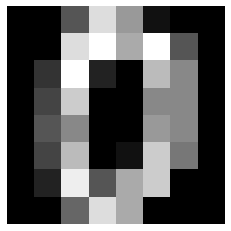

In [12]:
print("images 데이터의 차원 정보 :", digits.images.shape)
print("images 데이터의 값 :\n", digits.images[0])

plt.imshow(digits.images[0], cmap='gray')
plt.axis('off')
plt.show()

images 항목은 시각화를 위해 8x8 형태로 표현해 둔 데이터인 듯 하다.

### 4. train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

pandas 패키지의 데이터프레임 함수를 이용하여 (N, 64 feature + 1 label)로 구성되는 데이터프레임을 작성하자

In [13]:
import pandas as pd

digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [14]:
digits_df['label'] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


데이터셋을 학습용 데이터셋과 테스트용 데이터셋으로 나누자.  
현재 데이터셋은 데이터가 순차적으로 정렬되어 있기 때문에 random shuffle을 해주어  
데이터가 고르게 분포하도록 설정하자.  
데이터셋의 수는 8:2로 배분하자.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=.2,
                                                    random_state=2)

print("Train 데이터 셋 : {0}개".format(len(X_train)))
print("Test 데이터 셋 : {0}개".format(len(X_test)))

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Train 데이터 셋 : 1437개
Test 데이터 셋 : 360개
(1437, 64) (1437,)
(360, 64) (360,)


### 5. 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?  

 - Decision Tree 사용해 보기
 - Random Forest 사용해 보기
 - SVM 사용해 보기
 - SGD Classifier 사용해 보기
 - Logistic Regression 사용해 보기

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.84      0.84      0.84        44
           2       0.88      0.94      0.91        31
           3       0.77      0.75      0.76        36
           4       0.90      0.74      0.81        35
           5       0.95      0.84      0.89        43
           6       1.00      0.91      0.96        35
           7       0.88      0.88      0.88        40
           8       0.66      0.75      0.70        36
           9       0.65      0.86      0.74        28

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      0.94      0.97        36
           4       0.91      0.89      0.90        35
           5       0.98      0.98      0.98        43
           6       1.00      0.97      0.99        35
           7       0.91      1.00      0.95        40
           8       0.97      0.94      0.96        36
           9       0.90      0.93      0.91        28

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [19]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        36
           4       1.00      0.91      0.96        35
           5       0.98      1.00      0.99        43
           6       1.00      1.00      1.00        35
           7       0.98      1.00      0.99        40
           8       0.92      0.94      0.93        36
           9       0.96      0.93      0.95        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [20]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.90      0.98      0.93        44
           2       1.00      1.00      1.00        31
           3       1.00      0.83      0.91        36
           4       1.00      0.86      0.92        35
           5       0.98      0.93      0.95        43
           6       0.97      0.94      0.96        35
           7       0.91      0.97      0.94        40
           8       1.00      0.75      0.86        36
           9       0.65      1.00      0.79        28

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.92       360
weighted avg       0.94      0.93      0.93       360



In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.94      0.92      0.93        36
           4       0.94      0.89      0.91        35
           5       0.98      0.95      0.96        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.81      0.97      0.89        36
           9       0.86      0.89      0.88        28

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6. 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?  
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요.  
선택하신 이유도 설명해 주세요.

 - 학습에서의 평가 기준은 주어진 이미지로부터 예측한 숫자 값이 label의 수치와 일치하는지를 확인하는 것이다.
 - 따라서 10개의 클래스 중에서 정답에 해당하는 클래스를 맞추고 오답인 9개의 클래스를 피해야 정답률이 올라간다.
 - 세부적으로 나눠보면 아래와 같은 기준으로 평가할 수 있을 듯 하다.
 - True Positive : 예측 결과가 실제 정답과 일치할 경우 
 - False Positive : 이진 분류가 아니기 때문에 문제에 해당하지 않을 듯 하다.
 - False Negative : 예측 결과가 실제 정답과 일치하지 않을 경우
 - True Negative : 이진 분류가 아니기 때문에 문제에 해당하지 않을 듯 하다.
 - 즉 평가지표 상에서 의미있는 지표는 TP와 FN으로 표현되는 Recall 평가지표가 적절하다고 생각한다.
 - 위에서 실행한 평가 모델들 중에서는 ensemble 기법과 SVM 기법에서 Recall 성능이 우수한 결과를 보인다.
 

# 1-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다

### 1. 필요한 모듈 import하기

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2. 데이터 준비

In [23]:
wine = load_wine()

### 3. 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

 - Feature Data 지정하기
 - Label Data 지정하기
 - Target Names 출력해 보기
 - 데이터 Describe 해 보기

In [24]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


### 와인 데이터셋 설명
 - 인스턴스 개수 : 178개(3개의 클래스에 각각 50개 가량의 인스턴스가 들어있다.)
 - 13개의 평가지표
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash  
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
 - 클래스명
    - class_0
    - class_1
    - class_2
 - 데이터를 구성하는 수치에 대한 수치 분석 값들(수학적 지식이 있다면 한번 분석해볼 수 있을 듯 하다.)
 - 수집된 데이터는 이탈리아의 같은 지역에서 생산된 와인의 화학 분석 자료이며 와인의 종류는 3가지이다.
 - 이런 문구로 보아 데이터에 대한 신뢰성을 확인할 수 있다.

In [25]:
wine_DESCR = wine.DESCR
print(wine_DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [26]:
wine_data = wine.data

print(wine_data)
print(wine_data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)


178개의 와인 샘플에 대해서 13종의 데이터 분류값이 있다.

In [27]:
wine_label = wine.target

print(wine_label)
print(wine_label.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


178개의 데이터에 대해 3종의 클래스가 존재하며 순차적으로 정렬된 데이터이다.

In [28]:
print(wine.frame)

None


frame에는 아무 데이터도 없는 듯 하다.

In [29]:
wine_target_names = wine.target_names

print(wine_target_names)

['class_0' 'class_1' 'class_2']


클래스는 총 3종류이다.

In [30]:
wine_feature_names = wine.feature_names

print(wine_feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


데이터가 각각 의미하는 바는 모르겠으나 13종의 입력데이터가 있다.

### 4. train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [31]:
import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine_feature_names)
wine_df['label'] = wine_label
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


데이터와 레이블 각 컬럼의 이름으로 구성되는 데이터프레임을 작성하였다.

In [32]:
print(wine_df.count())

print(wine_df.isnull().any(axis=1))

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
label                           178
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool


데이터를 이용하기 위하여 결측치가 있는지 확인해보니 결측치 없는 잘 정리된 데이터임을 확인했다.

In [33]:
print(wine_df.iloc[:,-1:])

     label
0        0
1        0
2        0
3        0
4        0
..     ...
173      2
174      2
175      2
176      2
177      2

[178 rows x 1 columns]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(wine_df.iloc[:,:13],
                                                    wine_df.iloc[:,-1:].squeeze(),
                                                    test_size=.2,
                                                    random_state=9)

print("x_train 개수: ", len(x_train),", x_test 개수: ", len(x_test))
print("y_train 개수: ", len(y_train),", y_test 개수: ", len(y_test))

x_train 개수:  142 , x_test 개수:  36
y_train 개수:  142 , y_test 개수:  36


In [35]:
wine_df.iloc[:,-1:].shape

(178, 1)

In [36]:
a = wine_df.iloc[:,-1:].squeeze()
a.shape

(178,)

### 5. 다양한 모델로 학습시켜보기
학습데이터 x_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?  

 - Decision Tree 사용해 보기
 - Random Forest 사용해 보기
 - SVM 사용해 보기
 - SGD Classifier 사용해 보기
 - Logistic Regression 사용해 보기

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [40]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.73      0.70        11
           2       0.43      0.38      0.40         8

    accuracy                           0.75        36
   macro avg       0.68      0.68      0.68        36
weighted avg       0.74      0.75      0.75        36



In [41]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.59      0.91      0.71        11
           2       0.00      0.00      0.00         8

    accuracy                           0.72        36
   macro avg       0.48      0.62      0.53        36
weighted avg       0.58      0.72      0.64        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6. 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?  
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요.  
선택하신 이유도 설명해 주세요.

 - 학습에서의 평가 기준은 주어진 데이터로부터 예측한 와인의 종류가 label과 일치하는지 확인하는 것이다.
 - 모델의 문제는 다중 클래스 분류 문제로 정의할 수 있다.
 - 따라서 3개의 클래스 중에서 정답에 해당하는 클래스를 맞추고 오답인 2개의 클래스를 피해야 정답률이 올라간다.
 - 세부적으로 나눠보면 아래와 같은 기준으로 평가할 수 있을 듯 하다.
 - True Positive : 예측 결과가 실제 정답과 일치할 경우 
 - False Positive : 이진 분류가 아니기 때문에 문제에 해당하지 않을 듯 하다.
 - False Negative : 예측 결과가 실제 정답과 일치하지 않을 경우
 - True Negative : 이진 분류가 아니기 때문에 문제에 해당하지 않을 듯 하다.
 - 즉 평가지표 상에서 의미있는 지표는 TP와 FN으로 표현되는 Recall 평가지표가 적절하다고 생각한다.
 - 위에서 실행한 평가 모델들 중에서는 tree 기법과 ensemble 기법과 Logistic Regression 기법에서 Recall 성능이 우수한 결과를 보인다.
 - 또한 ensemble 기법과 Logistic Regression 기법은 정답률이 100%로 성능이 가장 우수하다.
 

# 1-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### 1. 필요한 모듈 import하기

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2. 데이터 준비

In [44]:
breast_cancer = load_breast_cancer()

### 3. 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

 - Feature Data 지정하기
 - Label Data 지정하기
 - Target Names 출력해 보기
 - 데이터 Describe 해 보기

In [45]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 유방암 데이터셋 설명
 - 인스턴스 개수 : 569개(양성과 음성을 분류하는 2진 분류인 듯 하다.)
 - 30개의 평가지표
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
 - 클래스명
    - WDBC-Malignant
    - WDBC-Benign
 - 데이터를 구성하는 수치에 대한 수치 분석 값들(수학적 지식이 있다면 한번 분석해볼 수 있을 듯 하다.)

In [46]:
breast_cancer_data = breast_cancer.data

print(breast_cancer_data)
print(breast_cancer_data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


569개의 와인 샘플에 대해서 30종의 데이터 분류값이 있다.

In [47]:
breast_cancer_label = breast_cancer.target

print(breast_cancer_label)
print(breast_cancer_label.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

569개의 데이터에 대한 label이 무작위로 들어있다.

In [48]:
print(breast_cancer.frame)

None


frame에는 아무 데이터도 없는 듯 하다.

In [49]:
breast_cancer_label_names = breast_cancer.target_names

print(breast_cancer_label_names)

['malignant' 'benign']


클래스 명으로 'malignant' 'benign' 두 종류의 클래스가 들어있다.  
각각 양성과 음성을 의미하는 듯 하다.

In [50]:
breast_cancer_feature_names = breast_cancer.feature_names

print(breast_cancer_feature_names)
print(breast_cancer_feature_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


30종의 입력 데이터의 이름이 들어있다.

In [51]:
print(breast_cancer.filename)

breast_cancer.csv


데이터가 저장되있는 파일명 : breast_cancer.csv

### 4. train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [53]:
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer_feature_names)
breast_cancer_df['label'] = breast_cancer_label
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


데이터와 레이블 각 컬럼의 이름으로 구성되는 데이터프레임을 작성하였다.

In [54]:
print(breast_cancer_df.count())

print(breast_cancer_df.isnull().any(axis=1))

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
label                      569
dtype: int64
0      False
1      False


데이터를 이용하기 위하여 결측치가 있는지 확인해보니 결측치 없는 잘 정리된 데이터임을 확인했다.

In [55]:
print(breast_cancer_df.iloc[:,-1:])

     label
0        0
1        0
2        0
3        0
4        0
..     ...
564      0
565      0
566      0
567      0
568      1

[569 rows x 1 columns]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer_df.iloc[:,:13],
                                                    breast_cancer_df.iloc[:,-1:].squeeze(),
                                                    test_size=.2,
                                                    random_state=9)

print("x_train 개수: ", len(x_train),", x_test 개수: ", len(x_test))
print("y_train 개수: ", len(y_train),", y_test 개수: ", len(y_test))

x_train 개수:  455 , x_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


### 5. 다양한 모델로 학습시켜보기
학습데이터 x_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?  

 - Decision Tree 사용해 보기
 - Random Forest 사용해 보기
 - SVM 사용해 보기
 - SGD Classifier 사용해 보기
 - Logistic Regression 사용해 보기

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.96      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [62]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81        40
           1       0.86      0.99      0.92        74

    accuracy                           0.89       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.90      0.89      0.88       114



In [63]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.62      0.76        40
           1       0.83      0.99      0.90        74

    accuracy                           0.86       114
   macro avg       0.90      0.81      0.83       114
weighted avg       0.88      0.86      0.85       114



In [64]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.90      0.93      0.91        74

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.89      0.89      0.88       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6. 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?  
모델의 성능을 평가하는 지표로는 무엇이 좋을까요?  
sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요.  
선택하신 이유도 설명해 주세요.

 - 학습에서의 평가 기준은 주어진 데이터를 바탕으로 유방암 양성인지 음성인지 판정하는 것이다.
 - 따라서 모델의 성격을 이진 분류 문제로 정의할 수 있다.
 - 세부적으로 나눠보면 아래와 같은 기준으로 평가할 수 있을 듯 하다.
 - True Positive : 실제 정답이 P인데 P로 판정할 경우 
 - False Positive : 실제 정답이 P인데 N으로 판정할 경우
 - False Negative : 실제 정답이 N인데 P로 판정할 경우
 - True Negative : 실제 정답이 N인데 N으로 판정할 경우
 - 평가지표 상에서 4가지 모두에서 False 판정을 낮추고 True 판정을 높여야 정답률이 올라가기 때문에 accuracy 평가지표를 사용한다.
 - 위에서 실행한 평가 모델들 중에서는 tree 기법과 ensemble 기법에서 accuracy 성능이 우수한 결과를 보인다.
 